In [1]:
# General libraries
import pandas as pd
import numpy as np

# Graphic libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

# Scikit Learn libraries
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor

# **Load Dataset**

* Rosetta features description: https://www.rosettacommons.org/docs/latest/rosetta_basics/scoring/score-types





In [2]:
folder_path = "../data/"
df_solubility = pd.read_csv(folder_path + "complex_raw_data.csv")

In [3]:
df_solubility.head()

SCORE:  total_score    score  dslf_fa13    fa_atr   fa_dun  fa_elec  \
0  SCORE:     -470.914 -470.914      0.000 -1203.414  338.522 -341.858   
1  SCORE:     -619.930 -619.930      0.000 -1890.675  497.641 -474.868   
2  SCORE:     -265.255 -265.255      0.000  -835.965  263.453 -240.659   
3  SCORE:     -844.622 -844.622     -0.844 -2087.197  547.917 -575.513   
4  SCORE:     -830.058 -830.058      0.000 -1848.881  425.681 -545.863   

   fa_intra_rep  fa_intra_sol_xover4   fa_rep  ...   omega  \
0         2.604               46.000  129.335  ...  11.135   
1         3.522               61.099  236.580  ...  18.094   
2         1.869               35.778  110.637  ...   5.542   
3         4.085               69.996  265.698  ...  11.092   
4         3.959               58.497  194.939  ...   7.321   

   overlap_chainbreak  p_aa_pp  pro_close  rama_prepro      ref  time  \
0                 0.0  -34.513      0.769        7.706   60.218   1.0   
1                 0.0  -48.935      4.452       21.634  147.414   1.0   
2                 0.0  -22.884      0.475       -1.901   54.992   0.0   
3                 0.0  -68.061      2.464       -4.538   88.832   0.0   
4                 0.0  -43.925      3.180       12.627   91.631   0.0   

   yhh_planarity              description  solubility  
0          0.108  pdb1a0f.ent_A_0001_0001          77  
1          0.158  pdb1a5t.ent_A_0001_0001          38  
2          0.023  pdb1a6j.ent_A_0001_0001          83  
3          1.059  pdb1a99.ent_A_0001_0001          62  
4          0.289  pdb1abe.ent_A_0001_0001          87  

[5 rows x 27 columns]

# Preprocessing

In [4]:
# Check if there is any missing value.
# Must return 0.
df_solubility.isna().sum().sum()

0

In [5]:
df_solubility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SCORE:               405 non-null    object 
 1   total_score          405 non-null    float64
 2   score                405 non-null    float64
 3   dslf_fa13            405 non-null    float64
 4   fa_atr               405 non-null    float64
 5   fa_dun               405 non-null    float64
 6   fa_elec              405 non-null    float64
 7   fa_intra_rep         405 non-null    float64
 8   fa_intra_sol_xover4  405 non-null    float64
 9   fa_rep               405 non-null    float64
 10  fa_sol               405 non-null    float64
 11  hbond_bb_sc          405 non-null    float64
 12  hbond_lr_bb          405 non-null    float64
 13  hbond_sc             405 non-null    float64
 14  hbond_sr_bb          405 non-null    float64
 15  linear_chainbreak    405 non-null    flo

In [6]:
# Are all columns with significant value?
df_solubility.describe()

total_score        score   dslf_fa13       fa_atr       fa_dun  \
count   405.000000   405.000000  405.000000   405.000000   405.000000   
mean   -660.909341  -660.909343   -0.031175 -1662.169333   417.837035   
std     372.176345   372.176338    0.409363   881.899785   227.145880   
min   -2145.657000 -2145.657000   -5.404000 -5693.017000    58.140000   
25%    -888.386000  -888.386000    0.000000 -2136.624000   256.230000   
50%    -621.309000  -621.309000    0.000000 -1581.975000   374.421000   
75%    -392.645000  -392.645000    0.000000  -965.458000   518.917000   
max     108.085000   108.085000    4.902000  -152.808000  1496.329000   

           fa_elec  fa_intra_rep  fa_intra_sol_xover4      fa_rep  \
count   405.000000    405.000000           405.000000  405.000000   
mean   -461.458563      3.185533            56.908037  195.155232   
std     245.769657      1.628280            29.314179  116.803439   
min   -1609.998000      0.500000             7.690000   13.187000   
25%    -601.431000      2.001000            34.343000  109.714000   
50%    -432.050000      2.933000            53.377000  175.765000   
75%    -268.588000      4.032000            70.347000  250.788000   
max     -34.770000     10.779000           204.734000  787.426000   

            fa_sol  ...  lk_ball_wtd       omega  overlap_chainbreak  \
count   405.000000  ...   405.000000  405.000000               405.0   
mean    997.474953  ...   -40.763867   26.701625                 0.0   
std     538.269300  ...    21.969469   26.211415                 0.0   
min      98.422000  ...  -140.635000    0.406000                 0.0   
25%     574.828000  ...   -51.688000    8.171000                 0.0   
50%     922.336000  ...   -38.137000   18.850000                 0.0   
75%    1288.549000  ...   -23.972000   35.629000                 0.0   
max    3498.846000  ...    -4.531000  167.643000                 0.0   

          p_aa_pp   pro_close  rama_prepro         ref        time  \
count  405.000000  405.000000   405.000000  405.000000  405.000000   
mean   -52.729393    2.034030     8.808395   97.757899    0.059259   
std     26.769766    2.438288    20.412649   52.213834    0.236401   
min   -189.837000    0.056000   -40.344000    0.160000    0.000000   
25%    -66.829000    0.886000    -5.907000   57.928000    0.000000   
50%    -49.317000    1.513000     6.711000   92.886000    0.000000   
75%    -33.371000    2.458000    20.826000  128.078000    0.000000   
max     -5.532000   24.243000   108.660000  288.724000    1.000000   

       yhh_planarity  solubility  
count     405.000000  405.000000  
mean        0.205395   59.419753  
std         0.242374   32.366429  
min         0.000000    2.000000  
25%         0.037000   30.000000  
50%         0.125000   64.000000  
75%         0.266000   86.000000  
max         1.904000  133.000000  

[8 rows x 25 columns]

In [7]:
df_solubility['description'].describe()

count                         405
unique                        405
top       pdb1a0f.ent_A_0001_0001
freq                            1
Name: description, dtype: object

In [8]:
# Remove 'overlap_chainbreak' and 'linear_chainbreak' because are constants / only have 1 value.
df_solubility.drop(columns=[
    'overlap_chainbreak', 
    'linear_chainbreak',
    'SCORE:'], 
    axis=1, inplace=True)


# Remove description because each row have a diferent value. Basicaly an index.
df_solubility.drop(columns=['description'], axis=1, inplace=True)


# Remove total_score and score since it is not a protein property
df_solubility.drop(columns=[
    'total_score',
    'score'
], axis=1, inplace=True)

# Standardize and split data into train and test

In [9]:
# Split datasets into train and test
# Save data into 4 csv files: x_train, x_test, y_train, y_test

# Split the Y from the X
df_sol_X = df_solubility.copy()
df_sol_X.drop(columns=['solubility'], axis=1, inplace=True)
df_sol_y = df_solubility[['solubility']]


# Split in train and test
x_train, x_test, y_train, y_test = train_test_split(
                        df_sol_X, df_sol_y, 
                        train_size = 0.8,
                        test_size = 0.2,
                        random_state = 10
                        )


# Standarddize data
standardizer = MinMaxScaler()
standardized_x_train = standardizer.fit_transform(x_train)
standardized_x_test = standardizer.transform(x_test)

# Create a df with the column names
df_standardized_x_train = pd.DataFrame(standardized_x_train, columns =x_train.columns)
df_standardized_x_test = pd.DataFrame(standardized_x_test, columns =x_test.columns)

# Write into a csv
df_standardized_x_train.to_csv(folder_path + 'x_train.csv', index=False)
df_standardized_x_test.to_csv(folder_path + 'x_test.csv', index=False)
y_train.to_csv(folder_path + 'y_train.csv', index=False)
y_test.to_csv(folder_path + 'y_test.csv', index=False)

In [10]:
# For data analysis:
# Join the standardized x train with y train (y train was not standardized)

df_standardized_train = df_standardized_x_train.copy()
df_standardized_train["solubility"] = y_train.values

df_standardized_train.head()

dslf_fa13    fa_atr    fa_dun   fa_elec  fa_intra_rep  fa_intra_sol_xover4  \
0    0.22973  0.763596  0.308557  0.775237      0.338457             0.243961   
1    0.22973  0.701397  0.316951  0.706863      0.311703             0.261941   
2    0.22973  0.934183  0.104464  0.930745      0.074034             0.117862   
3    0.22973  0.503359  0.489959  0.519385      0.506761             0.425321   
4    0.22973  0.946765  0.046850  0.936256      0.048643             0.062377   

     fa_rep    fa_sol  hbond_bb_sc  hbond_lr_bb  ...  hbond_sr_bb  \
0  0.297071  0.233128     0.801774     0.686648  ...     0.780078   
1  0.278929  0.294983     0.693164     0.630547  ...     0.733178   
2  0.039392  0.093871     0.991470     0.971738  ...     0.821288   
3  0.454789  0.470166     0.523125     0.461226  ...     0.576508   
4  0.041516  0.069711     0.970284     0.899250  ...     0.914094   

   lk_ball_wtd     omega   p_aa_pp  pro_close  rama_prepro       ref  time  \
0     0.771760  0.201707  0.734554   0.040848     0.712342  0.523591   0.0   
1     0.694929  0.074615  0.636059   0.065490     0.423793  0.334937   0.0   
2     0.917112  0.044517  0.954476   0.003597     0.268529  0.001079   0.0   
3     0.483125  0.798760  0.529375   0.816637     0.601882  0.801711   0.0   
4     0.911180  0.011580  0.907310   0.019308     0.267537  0.034116   0.0   

   yhh_planarity  solubility  
0       0.013655          94  
1       0.097689          66  
2       0.002101          98  
3       0.056723          10  
4       0.003151          23  

[5 rows x 21 columns]

# Exploratory Data Analysis (EDA)

## Distribution

array([[<AxesSubplot:title={'center':'dslf_fa13'}>,
        <AxesSubplot:title={'center':'fa_atr'}>,
        <AxesSubplot:title={'center':'fa_dun'}>,
        <AxesSubplot:title={'center':'fa_elec'}>,
        <AxesSubplot:title={'center':'fa_intra_rep'}>],
       [<AxesSubplot:title={'center':'fa_intra_sol_xover4'}>,
        <AxesSubplot:title={'center':'fa_rep'}>,
        <AxesSubplot:title={'center':'fa_sol'}>,
        <AxesSubplot:title={'center':'hbond_bb_sc'}>,
        <AxesSubplot:title={'center':'hbond_lr_bb'}>],
       [<AxesSubplot:title={'center':'hbond_sc'}>,
        <AxesSubplot:title={'center':'hbond_sr_bb'}>,
        <AxesSubplot:title={'center':'lk_ball_wtd'}>,
        <AxesSubplot:title={'center':'omega'}>,
        <AxesSubplot:title={'center':'p_aa_pp'}>],
       [<AxesSubplot:title={'center':'pro_close'}>,
        <AxesSubplot:title={'center':'rama_prepro'}>,
        <AxesSubplot:title={'center':'ref'}>,
        <AxesSubplot:title={'center':'time'}>,
        <AxesSubpl

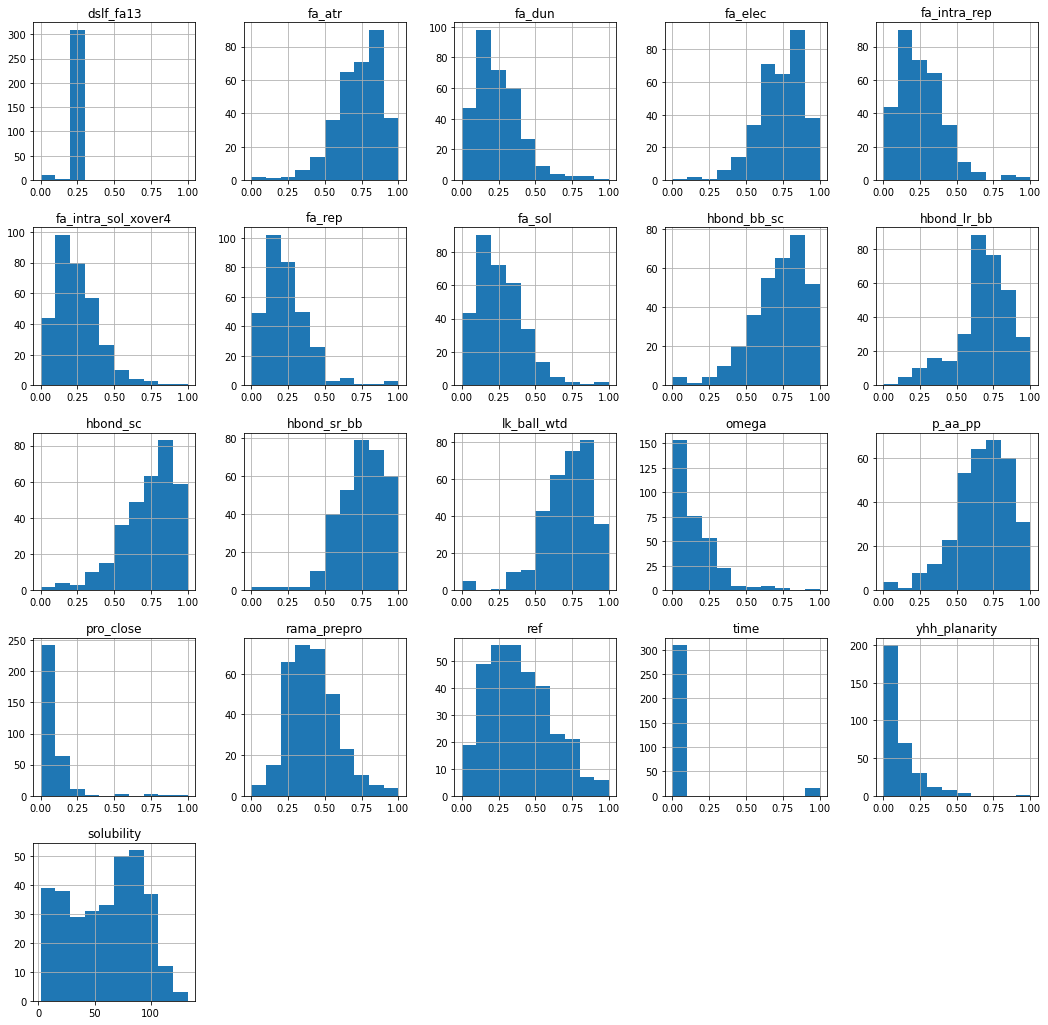

In [11]:
# Plot histogram only with train data
df_standardized_train.hist(figsize=(18, 18))

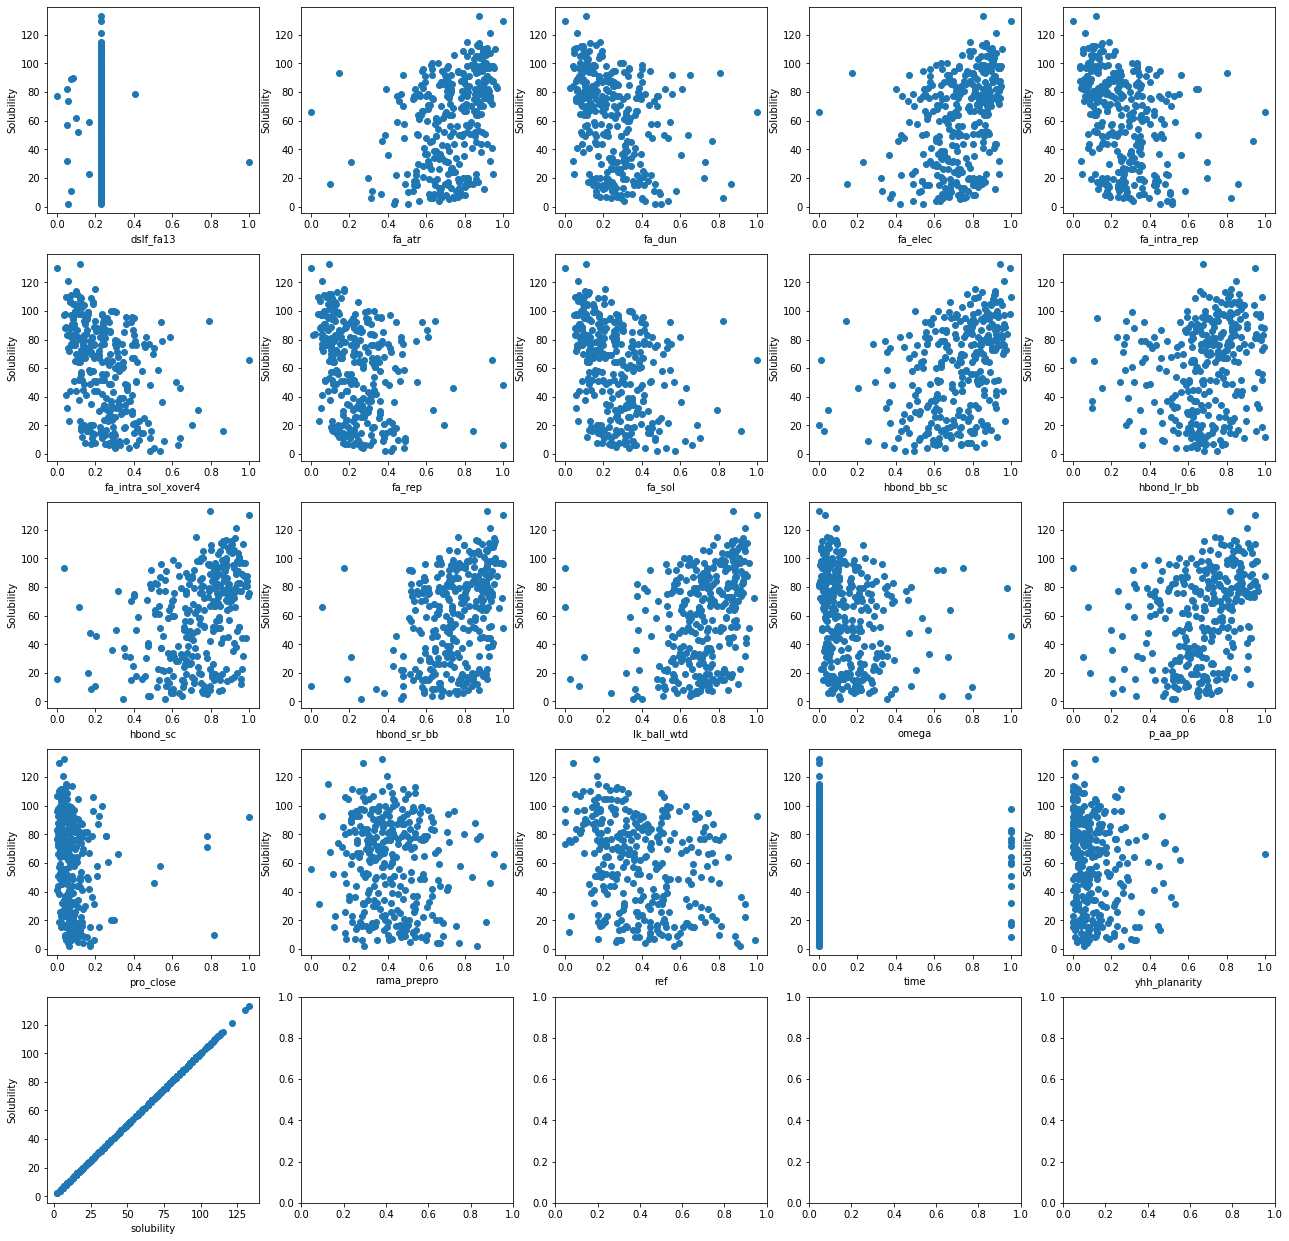

In [12]:
# Scatter plot to check linearity between the dependent variables with the dependent (solubility)

fig, axs = plt.subplots(5, 5, figsize=(22,22))

features = list(df_standardized_train.columns)

for row_position in range(0,5):
    
    for column_position in range(0,5):
        
        if features == []:
            break

        axs[row_position, column_position].scatter(df_standardized_train[features[0]], df_standardized_train.solubility)
        axs[row_position, column_position].set_xlabel(features[0])
        axs[row_position, column_position].set_ylabel("Solubility")

        features.pop(0)

plt.show()


/Users/renan/Library/Python/3.7/lib/python/site-packages/seaborn/axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



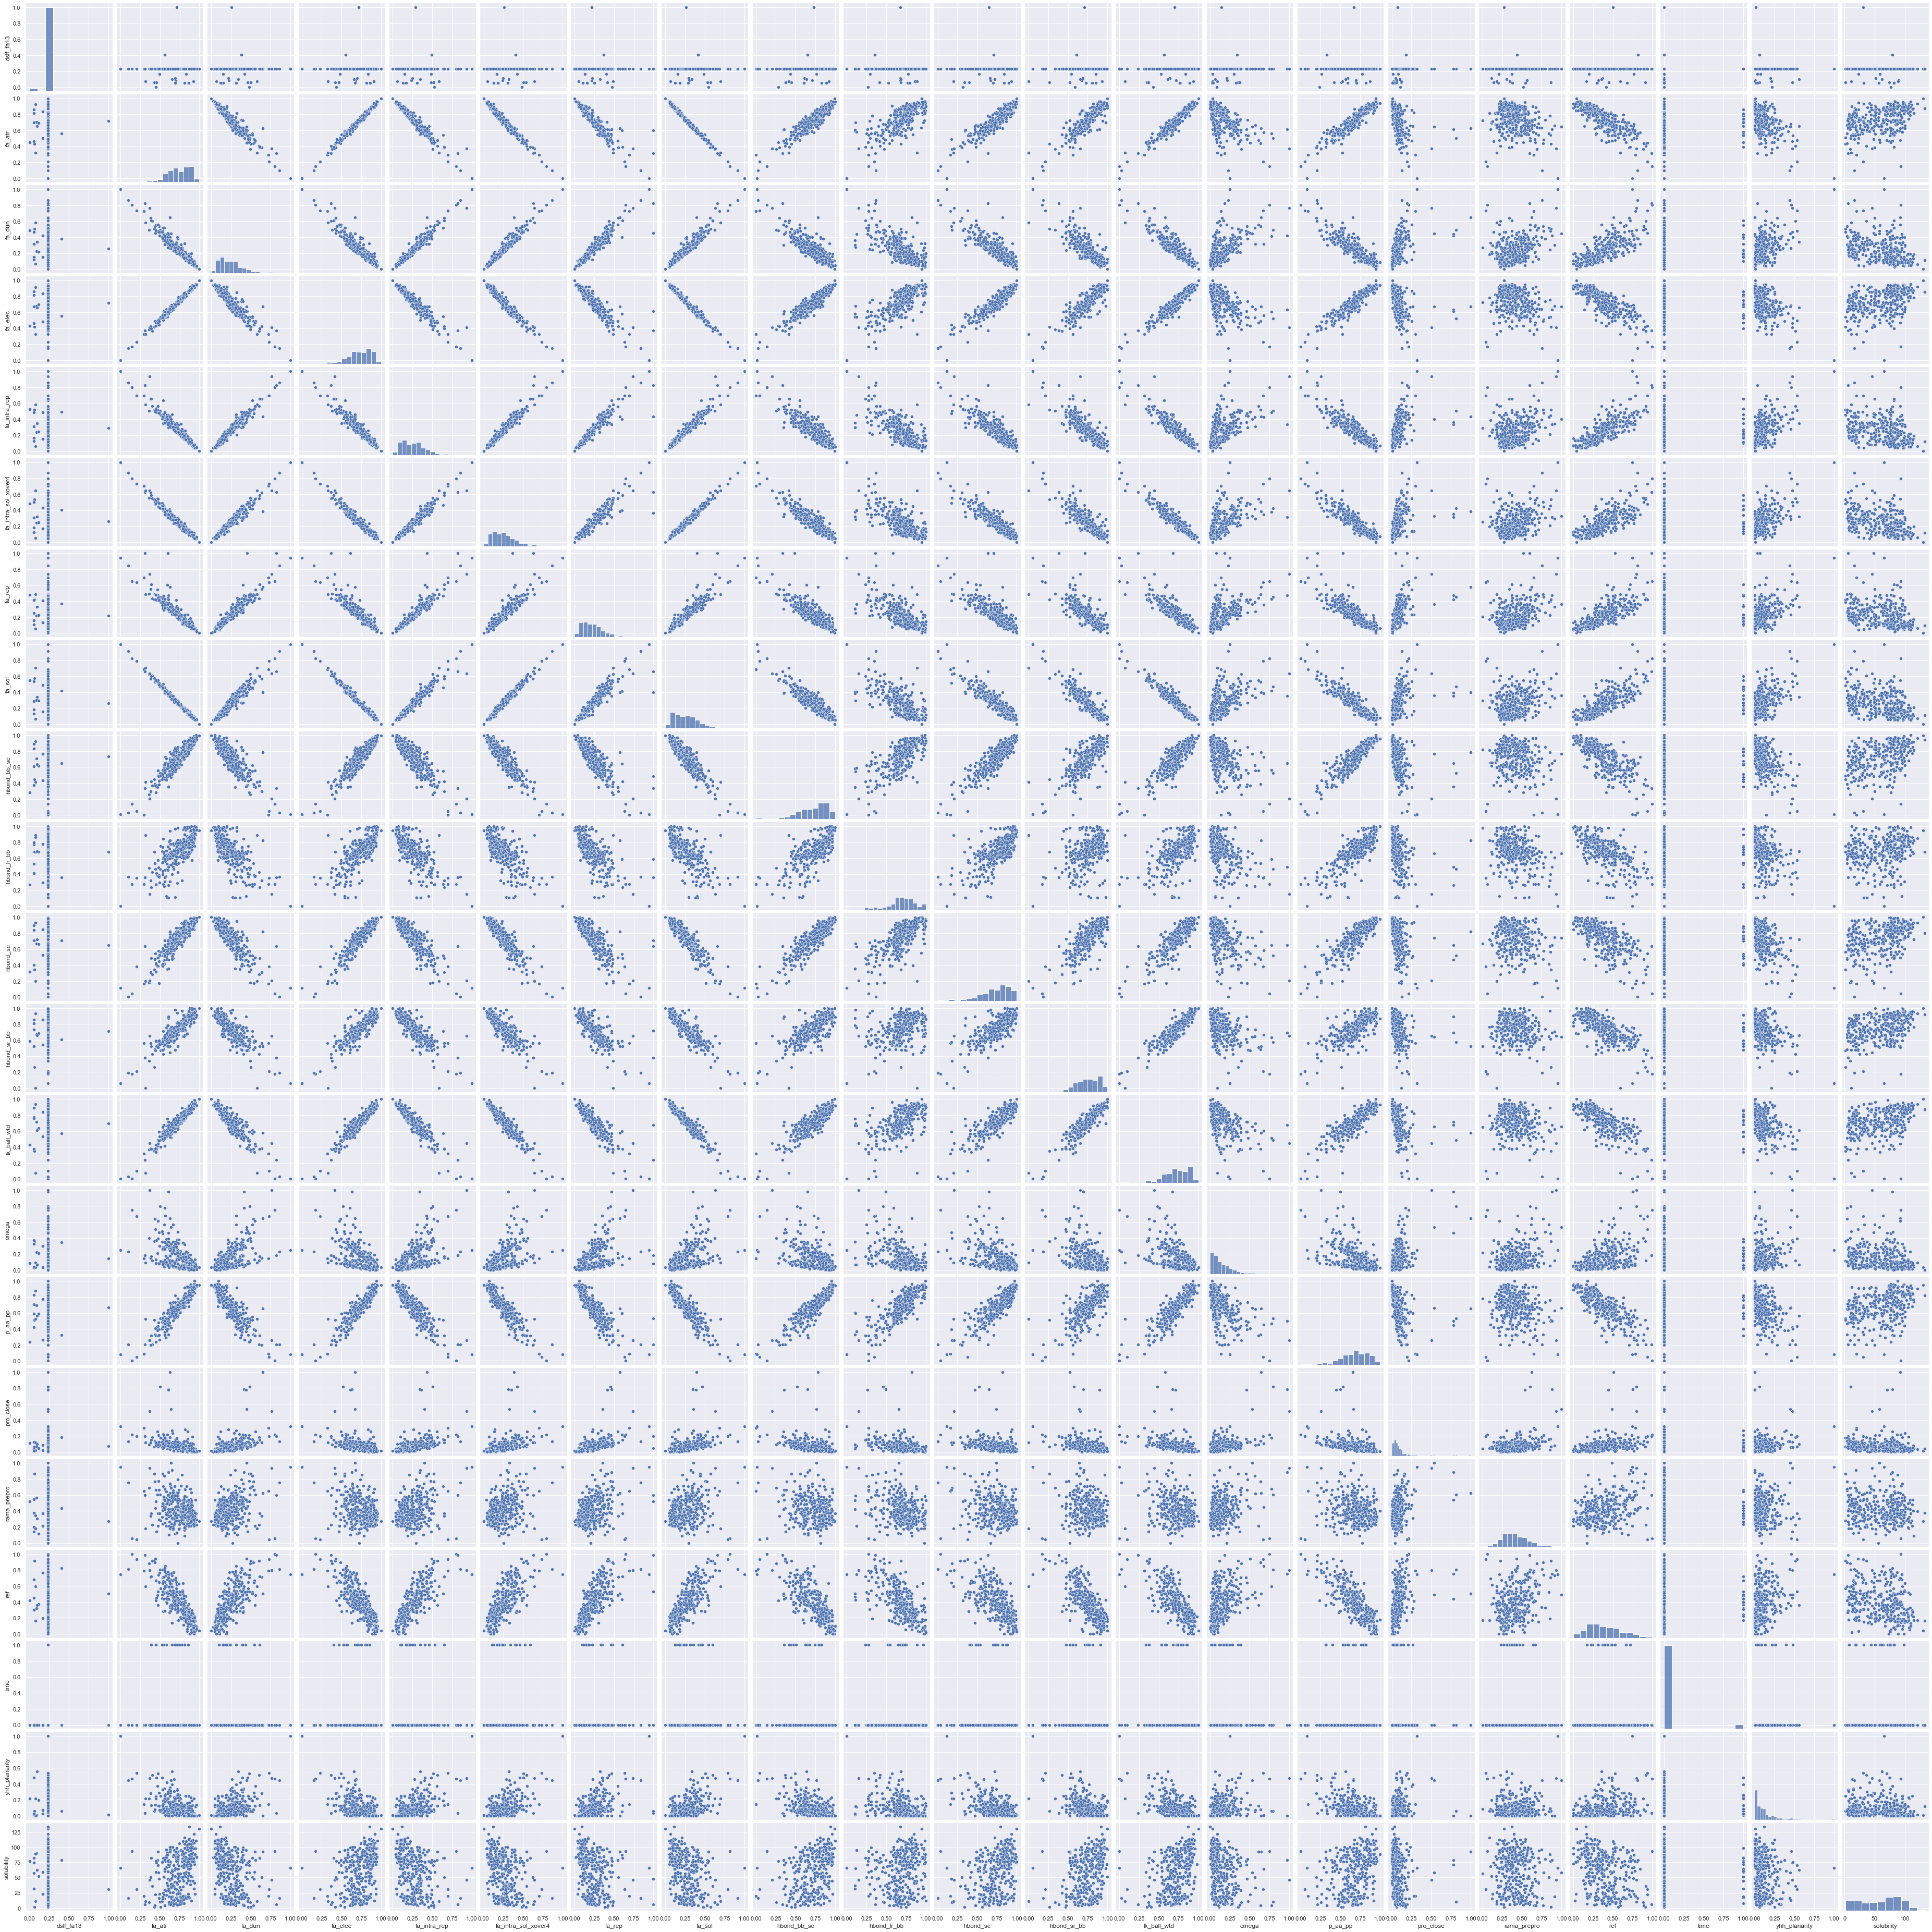

In [13]:
# Scatter plot between all features

sns.set()
cols = list(df_standardized_train.columns)
sns.pairplot(df_standardized_train[cols], size=2.5)
plt.show()

# Correlation

In [14]:
# Create Pearson Correlation dataset between all features

pearson_corr = df_standardized_train.corr()

pearson_corr.head()

dslf_fa13    fa_atr    fa_dun   fa_elec  fa_intra_rep  \
dslf_fa13      1.000000  0.054174 -0.039981  0.060646     -0.029034   
fa_atr         0.054174  1.000000 -0.957025  0.993736     -0.969724   
fa_dun        -0.039981 -0.957025  1.000000 -0.943857      0.974559   
fa_elec        0.060646  0.993736 -0.943857  1.000000     -0.956610   
fa_intra_rep  -0.029034 -0.969724  0.974559 -0.956610      1.000000   

              fa_intra_sol_xover4    fa_rep    fa_sol  hbond_bb_sc  \
dslf_fa13               -0.050215 -0.036608 -0.062230     0.071115   
fa_atr                  -0.986289 -0.920604 -0.996467     0.933333   
fa_dun                   0.972079  0.943321  0.960065    -0.873608   
fa_elec                 -0.978256 -0.903242 -0.992899     0.935171   
fa_intra_rep             0.971881  0.941989  0.968122    -0.887091   

              hbond_lr_bb  ...  hbond_sr_bb  lk_ball_wtd     omega   p_aa_pp  \
dslf_fa13        0.009228  ...     0.072019     0.065494  0.004227  0.038199   
fa_atr           0.721479  ...     0.893066     0.966570 -0.530808  0.932397   
fa_dun          -0.701978  ...    -0.833763    -0.916793  0.564250 -0.879604   
fa_elec          0.739992  ...     0.886497     0.953681 -0.518976  0.930455   
fa_intra_rep    -0.720146  ...    -0.843835    -0.929362  0.531600 -0.901877   

              pro_close  rama_prepro       ref      time  yhh_planarity  \
dslf_fa13      0.022238    -0.014985  0.013138  0.012494      -0.076422   
fa_atr        -0.435534    -0.283394 -0.820696 -0.071338      -0.594373   
fa_dun         0.526956     0.360329  0.742235  0.054797       0.565752   
fa_elec       -0.410786    -0.264678 -0.813229 -0.069869      -0.593384   
fa_intra_rep   0.482664     0.338479  0.795521  0.062598       0.575044   

              solubility  
dslf_fa13      -0.021612  
fa_atr          0.374763  
fa_dun         -0.331672  
fa_elec         0.359397  
fa_intra_rep   -0.338799  

[5 rows x 21 columns]

In [15]:
# Heatmap of pearson correlation matrix

data = [go.Heatmap( z=pearson_corr.values, x=list(pearson_corr.columns), y=list(pearson_corr.index), colorscale='Portland')]
iplot(data, filename='pandas-heatmap')
plt.show()

In [16]:
# Verify which columns have a corr above 0.95 or bellow -0.95
# The columns which fit in those criteria are then compared to check which one has a higher corr with the target. The worst is saved to be droped.
def high_corr_removal(og_df):
    dict_removables={}
    df = og_df.copy()
    for column in df.columns:
        dict_removables[column] = []
        for index in df.index.values:
            if (column != index and index != 'solubility' and column != 'solubility'):
                if df[column][index] > 0.95 or df[column][index] < -0.95:
                    n_df = df.copy()
                    if df['solubility'][column] > df['solubility'][index]:
                        feature_to_remove = index
                    else:
                        feature_to_remove = column
                    
                    dict_removables[column].append(feature_to_remove)
    
    return dict_removables


exp = high_corr_removal(pearson_corr)

print(exp)

{'dslf_fa13': [], 'fa_atr': ['fa_dun', 'fa_elec', 'fa_intra_rep', 'fa_intra_sol_xover4', 'fa_sol', 'fa_atr'], 'fa_dun': ['fa_dun', 'fa_intra_rep', 'fa_intra_sol_xover4', 'fa_sol'], 'fa_elec': ['fa_elec', 'fa_intra_rep', 'fa_intra_sol_xover4', 'fa_sol', 'fa_elec'], 'fa_intra_rep': ['fa_intra_rep', 'fa_intra_rep', 'fa_intra_rep', 'fa_intra_sol_xover4', 'fa_sol'], 'fa_intra_sol_xover4': ['fa_intra_sol_xover4', 'fa_intra_sol_xover4', 'fa_intra_sol_xover4', 'fa_intra_sol_xover4', 'fa_intra_sol_xover4', 'fa_intra_sol_xover4'], 'fa_rep': [], 'fa_sol': ['fa_sol', 'fa_sol', 'fa_sol', 'fa_sol', 'fa_intra_sol_xover4', 'fa_sol'], 'hbond_bb_sc': [], 'hbond_lr_bb': [], 'hbond_sc': [], 'hbond_sr_bb': [], 'lk_ball_wtd': ['fa_atr', 'fa_elec', 'fa_intra_sol_xover4', 'fa_sol'], 'omega': [], 'p_aa_pp': [], 'pro_close': [], 'rama_prepro': [], 'ref': [], 'time': [], 'yhh_planarity': [], 'solubility': []}


In [17]:
# Remove columns for high correlation
# fa_dun, fa_elec, fa_intra_rep, fa_intra_sol_xover4, fa_sol, fa_atr

df_del_high_corr = df_standardized_train.copy()

df_del_high_corr.drop(columns=[
    'fa_dun', 
    'fa_elec', 
    'fa_intra_rep',
    'fa_intra_sol_xover4',
    'fa_sol',
    'fa_atr'
    ], 
    axis=1, inplace=True)

pearson_corr_2 = df_del_high_corr.corr()

data = [go.Heatmap( z=pearson_corr_2.values, x=list(pearson_corr_2.columns), y=list(pearson_corr_2.index), colorscale='Portland')]
iplot(data, filename='pandas-heatmap')
plt.show()

In [18]:
# Save new data removing high corr columns
# Split datasets into train and test
# Save data into 4 csv files: x_train_2, x_test_2, y_train_2, y_test_2

df_sol_X_corr = df_solubility.copy()
df_sol_X_corr.drop(columns=['solubility'], axis=1, inplace=True)
df_sol_y_corr = df_solubility[['solubility']]


#remove high corr features
df_sol_X_corr.drop(columns=[
    'fa_dun', 
    'fa_elec', 
    'fa_intra_rep',
    'fa_intra_sol_xover4',
    'fa_sol',
    'fa_atr'
    ],
    axis=1, inplace=True)


# Split in train and test
x_train, x_test, y_train, y_test = train_test_split(
                        df_sol_X_corr, df_sol_y_corr, 
                        train_size = 0.8,
                        test_size = 0.2,
                        random_state = 10
                        )


# Standarddize data
standardizer = MinMaxScaler()
standardized_x_train = standardizer.fit_transform(x_train)
standardized_x_test = standardizer.transform(x_test)

# Create a df with the column names
df_standardized_x_train = pd.DataFrame(standardized_x_train, columns =x_train.columns)
df_standardized_x_test = pd.DataFrame(standardized_x_test, columns =x_test.columns)

# Write into a csv
df_standardized_x_train.to_csv(folder_path + 'x_train_2.csv', index=False)
df_standardized_x_test.to_csv(folder_path + 'x_test_2.csv', index=False)
y_train.to_csv(folder_path + 'y_train_2.csv', index=False)
y_test.to_csv(folder_path + 'y_test_2.csv', index=False)

# Conclusions / Overview

* No NA values;
* Only working with float64 values;
* Target ranges from 2 to 133;
* Removed 'overlap_chainbreak' and 'linear_chainbreak' because are constants / only have 1 value;
* Removed 'description' because each row have a diferent value. Basicaly an index;
* Removed 'score' and 'total_score' because are not proteins properties;
* Plotted histograms with raw and standardized values to check data distribution (no anomalies detected);
* Plotted scatter plot to check the if the relation between the X and Y variables are linear;
* Created a dataset and Plotted a heatmap to check the pearson correlation between features;
* Split the data into train and test, after that, use StandardScaler to standardize the data and write into csvs the x_train, x_test, y_train, y_test. Did the same removing the high corr features

In [20]:
from utils.utils import test

test()

ImportError: cannot import name 'test' from 'utils.utils' (/Users/renan/Documents/TCC/git-tcc/main_solubility/src/utils/utils.py)